In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Transient Heat Conduction (Boundary Value Problem - BVP)

$\frac{dT}{dt}=k \nabla^2T$

$\frac{dT}{dt}(z,t)=k\frac{d^2T}{dz^2}(z,t)$ (1D)

At this point two questions arise:\
    1) How does the temperature change as time progresses?\
    2) How does the temperature change as we move along the rod?
    
Note that the way any one of these values changes depends on the other values.


**Data**

Length of wall: L = 1 m\
Initial condition: T$_0$(z, t) = 150$^o$C\
Left boundary condition: T(0, t) = 100$^o$C\
Right boundary condition: T(L, t) = 200$^o$C

In [2]:
N = 100 # number of points to discretize
L = 1.0 # upper boundary
z = np.linspace(0, L, N) # position along the rod
dz = L / (N - 1) # grid spacing

def odefunc(t, T, k):

    dTdt = np.zeros(z.shape)
    dTdt[0] = 0 # constant at boundary condition
    dTdt[-1] = 0 # constant at boundary condition

    # now for the internal nodes
    for i in range(1, N-1):
        
        dTdt[i] = k * (T[i + 1] - 2*T[i] + T[i - 1]) / dz**2
    
    return dTdt

T_init = 150.0*np.ones(z.shape) # initial temperature

# we need (2) boundary condition as we have second order variation
T_init[0] = 100.0  # one boundary condition
T_init[-1] = 200.0 # the other boundary condition

tspan = np.linspace(0.0, 5.0, N)

k = 0.02

args = (k,)

sol = solve_ivp(odefunc, (0, tspan[-1]), T_init, t_eval = tspan, args = args)

In [3]:
sol.y

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [150.        , 108.96988123, 106.34430463, ..., 101.05195986,
        101.04971884, 101.05018134],
       [150.        , 117.25545988, 112.4319059 , ..., 102.10523977,
        102.10312614, 102.09586586],
       ...,
       [150.        , 182.74454012, 187.5680941 , ..., 197.89476023,
        197.89687386, 197.90413414],
       [150.        , 191.03011877, 193.65569537, ..., 198.94804014,
        198.95028116, 198.94981866],
       [200.        , 200.        , 200.        , ..., 200.        ,
        200.        , 200.        ]])

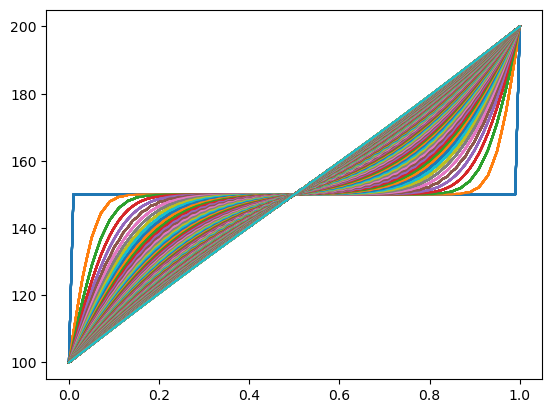

In [4]:
for i in range(0, len(tspan), 5):
    plt.plot(z, sol.y)

<Figure size 640x480 with 0 Axes>

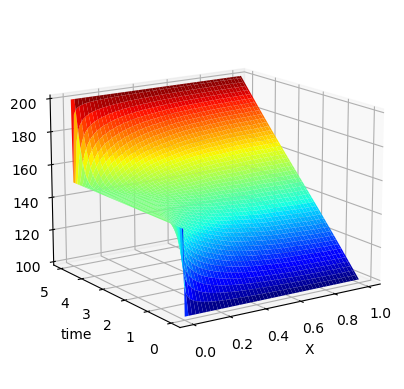

In [5]:
# adjust figure edges so the legend is in the figure
plt.subplots_adjust(top=0.89, right=0.77)

# Make a 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(z, tspan)
ax.plot_surface(SX, ST, sol.y, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('time')
ax.set_zlabel('T')
ax.view_init(elev=15, azim=-124) # adjust view so it is easy to see